https://xgboost.readthedocs.io/en/latest/index.html <br>
https://www.datacamp.com/community/tutorials/xgboost-in-python

In [1]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
%matplotlib inline

python -m pip install --upgrade pip

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data_dir = "dataset"
os.listdir("../"+os.sep+data_dir)

['housing.data.txt', 'iris.csv', 'iris.data.txt']

In [4]:
df = pd.read_csv("../"+os.sep+data_dir+os.sep+"housing.data.txt", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [9]:
X.shape

(506, 13)

In [10]:
y.shape

(506,)

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

In [13]:
type(DM_train)

xgboost.core.DMatrix

In [14]:
DM_train.num_row(), DM_train.num_col()

(404, 13)

In [15]:
DM_test.num_row(), DM_test.num_col()

(102, 13)

In [16]:
#params = {"booster":"gblinear","objective":"reg:linear"}
params = {"booster":"gbtree","objective":"reg:linear"}

In [17]:
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)

[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[01:26:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [18]:
print(dir(xg_reg))

['__class__', '__copy__', '__deepcopy__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_validate_features', 'attr', 'attributes', 'best_iteration', 'best_ntree_limit', 'boost', 'booster', 'copy', 'dump_model', 'eval', 'eval_set', 'feature_names', 'feature_types', 'get_dump', 'get_fscore', 'get_score', 'get_split_value_histogram', 'handle', 'load_model', 'load_rabit_checkpoint', 'predict', 'save_model', 'save_rabit_checkpoint', 'save_raw', 'set_attr', 'set_param', 'update']


In [19]:
y_train_pred = xg_reg.predict(DM_train)

In [20]:
print("Train RMSE: %f, R^2: %f" % (np.sqrt(mean_squared_error(y_train, y_train_pred)), r2_score(y_train, y_train_pred)))

Train RMSE: 1.758055, R^2: 0.963518


In [21]:
y_test_pred = xg_reg.predict(DM_test)

In [22]:
print("Test RMSE: %f, R^2: %f" % (np.sqrt(mean_squared_error(y_test, y_test_pred)), r2_score(y_test, y_test_pred)))

Test RMSE: 3.782443, R^2: 0.827077


```
booster : gblinear
Train RMSE: 6.270365, R^2: 0.535917
Test RMSE: 6.057113, R^2: 0.556557

booster: gbtree
Train RMSE: 1.758055, R^2: 0.963518
Test RMSE: 3.782443, R^2: 0.827077
```

In [27]:
import graphviz

In [40]:
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

set --> all variables
echo %PATH%

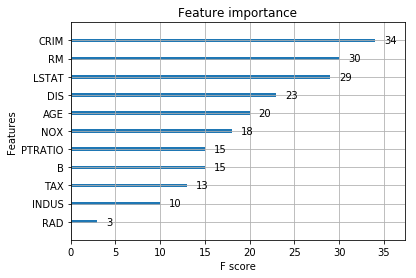

In [26]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [31]:
import lightgbm as lgb
DM1_train = lgb.Dataset(data=X_train, label=y_train)
DM1_test = lgb.Dataset(data=X_test,label=y_test)

In [33]:
params = {'learning_rate':0.001}
lg_reg= lgb.train(params, DM1_train, 100)

In [35]:
y_train_pred1 = lg_reg.predict(X_train)

In [37]:
y_test_pred1 = lg_reg.predict(X_test)

In [38]:
print("Train RMSE: %f, R^2: %f" % (np.sqrt(mean_squared_error(y_train, y_train_pred1)), r2_score(y_train, y_train_pred1)))

Train RMSE: 8.467122, R^2: 0.153783


# use tree for above